# Nutrition Calulator - Foundation Foods

mission statement

### To Do

- Filter outliers before averaging
- Need to simplify data set
    - Use regex to simplify proteins, fats, etc.
        - How to deal with 'total' entries.
    - [x] Look at EVERY table and understand all data 
    - Look at DV columns first
- Get list of recommended DV
    - Make the DV and nutrient columns have same names
    - Make sure servings/amount units are correct
- Write algorithm for meal prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

In [4]:
os.getcwd()

'C:\\Users\\Nathan\\Desktop\\Github_Portfolio\\nutrition_calculator'

In [5]:
ls C:\Users\Nathan\Desktop\Github_Portfolio\nutrition_calculator\FoodData_Central_foundation_food_csv

 Volume in drive C has no label.
 Volume Serial Number is B223-BA52

 Directory of C:\Users\Nathan\Desktop\Github_Portfolio\nutrition_calculator\FoodData_Central_foundation_food_csv

05/14/2024  09:55 AM    <DIR>          .
05/14/2024  09:55 AM    <DIR>          ..
05/14/2024  09:54 AM                76 .~lock.food_nutrient.csv#
04/05/2024  11:05 AM           139,887 acquisition_samples.csv
04/05/2024  11:05 AM            38,059 agricultural_samples.csv
04/05/2024  11:12 AM            36,563 Download API Field Descriptions.xlsx
04/05/2024  11:13 AM         5,314,559 food.csv
04/05/2024  11:13 AM           419,476 food_attribute.csv
04/05/2024  11:09 AM               331 food_attribute_type.csv
04/05/2024  11:13 AM             9,030 food_calorie_conversion_factor.csv
04/25/2024  06:48 AM               997 food_category.csv
04/05/2024  11:13 AM           158,565 food_component.csv
05/14/2024  09:53 AM         8,964,234 food_nutrient.csv
04/05/2024  11:13 AM           193,676 food_nutrien

In [6]:
## Explore tables ##

food = pd.read_csv('FoodData_Central_foundation_food_csv/food.csv')
food_att = pd.read_csv('FoodData_Central_foundation_food_csv/food_attribute.csv')
food_cal_conv = pd.read_csv('FoodData_Central_foundation_food_csv/food_calorie_conversion_factor.csv')
food_cat = pd.read_csv('FoodData_Central_foundation_food_csv/food_category.csv')
food_component = pd.read_csv('FoodData_Central_foundation_food_csv/food_component.csv')
food_nutr = pd.read_csv('FoodData_Central_foundation_food_csv/food_nutrient.csv')
food_nutr_conv = pd.read_csv('FoodData_Central_foundation_food_csv/food_nutrient_conversion_factor.csv')
food_portion = pd.read_csv('FoodData_Central_foundation_food_csv/food_portion.csv')
food_protein_conv = pd.read_csv('FoodData_Central_foundation_food_csv/food_protein_conversion_factor.csv')
food_update_log = pd.read_csv('FoodData_Central_foundation_food_csv/food_update_log_entry.csv')
food_foundation = pd.read_csv('FoodData_Central_foundation_food_csv/foundation_food.csv')
input_food = pd.read_csv('FoodData_Central_foundation_food_csv/input_food.csv')
lab_method = pd.read_csv('FoodData_Central_foundation_food_csv/lab_method.csv')
lab_method_code = pd.read_csv('FoodData_Central_foundation_food_csv/lab_method_code.csv')
lab_method_nutrient = pd.read_csv('FoodData_Central_foundation_food_csv/lab_method_nutrient.csv')
nutrient = pd.read_csv('FoodData_Central_foundation_food_csv/nutrient.csv')
sample_food = pd.read_csv('FoodData_Central_foundation_food_csv/sample_food.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# food_att.head() #not important
# food_cal_conv.head() #could be important for counting calories
# food_cat.head() #not important, links to food cat_id 
# food_component.head() #not important 
# food_nutr.head()
# food_nutr_conv.head() #connects food name and nutrient id with macro nutrients???
# food_portion.head()  #this will be important for common food portions 
food_protein_conv.head()  #might need to get protein content from this table
# food_update_log.head()  #not important
# food_foundation.head() #seemingly not important
# input_food.head() # essentially an ingredients list. May be used for exploratory DA or for general use in prediction.
# lab_method.head() #not important
# lab_method_code.head() #not important
# lab_method_nutrient.head() #not important
# nutrient.head()
# sample_food.head()

,food_nutrient_conversion_factor_id,value
0,22504,6.25
1,22506,6.38
2,22508,6.25
3,22509,0.00
4,22511,6.25


In [8]:
food_nutr.head()

,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,loq,footnote,min_year_acquired
0,2201847,319877,1051,56.30,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2201845,319877,1002,1.28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2201846,319877,1004,19.00,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2201844,319877,1007,1.98,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2201852,319878,1091,188.00,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
nutrient = nutrient.rename(columns = {'id':'nutrient_id'})
# food.head()
nutrient.head(1000)
# food_nutr.head() 
# nutrient['nutrient_id'== 2048]

,nutrient_id,name,unit_name,nutrient_nbr,rank
0,2047,Energy (Atwater General Factors),KCAL,957.0,280.0
1,2048,Energy (Atwater Specific Factors),KCAL,958.0,290.0
2,1001,Solids,G,201.0,200.0
3,1002,Nitrogen,G,202.0,500.0
4,1003,Protein,G,203.0,600.0
...,...,...,...,...,...
472,2064,Oligosaccharides,MG,NaN,2250.0
473,2065,Low Molecular Weight Dietary Fiber (LMWDF),G,293.4,1306.0
474,2068,Vitamin E,MG,959.0,7810.0
475,2067,Vitamin A,UG,960.0,7430.0


In [10]:
## Shaping Matrix of Foods and Their Nutrients ##

# Make a table where nutrients are columns and their amounts are entries
nutr_merge = pd.merge(left = food_nutr, right=nutrient[['nutrient_id', 'name']], on='nutrient_id', how='inner')

nutr_df = nutr_merge.pivot(index='fdc_id', columns='nutrient_id', values = 'amount')


#Make ID-name dictionary
nutr_name = {}
for i, nutr in enumerate(nutr_merge['nutrient_id']):
    if nutr not in nutr_name:
        nutr_name[nutr] = nutr_merge['name'][i]

#Rename columns to nutrient names 
nutr_df = nutr_df.rename(columns=nutr_name)
# nutr_df = nutr_merge.pivot(index='fdc_id', columns='name', values = 'amount') ##Duplicate error?##

#Combine food names with nutrition info
nutr_df = pd.merge(left = nutr_df, right=food[['fdc_id','description']], on='fdc_id', how='inner') 

# Make NaN's 0's
# nutrient = nutrient.fillna(0)
# nutrient.head()


In [11]:
nutr_name

{1051: 'Water',
 1002: 'Nitrogen',
 1004: 'Total lipid (fat)',
 1007: 'Ash',
 1091: 'Phosphorus, P',
 1101: 'Manganese, Mn',
 1092: 'Potassium, K',
 1087: 'Calcium, Ca',
 1093: 'Sodium, Na',
 1090: 'Magnesium, Mg',
 1089: 'Iron, Fe',
 1098: 'Copper, Cu',
 1095: 'Zinc, Zn',
 1170: 'Pantothenic acid',
 1264: 'SFA 14:0',
 1301: 'SFA 24:0',
 1335: 'SFA 11:0',
 1266: 'SFA 18:0',
 1272: 'PUFA 22:6 n-3 (DHA)',
 1260: 'SFA 6:0',
 1411: 'PUFA 22:4',
 1299: 'SFA 15:0',
 1278: 'PUFA 20:5 n-3 (EPA)',
 1311: 'PUFA 18:2 CLAs',
 1271: 'PUFA 20:4',
 1259: 'SFA 4:0',
 1265: 'SFA 16:0',
 1303: 'TFA 16:1 t',
 1276: 'PUFA 18:4',
 1273: 'SFA 22:0',
 1280: 'PUFA 22:5 n-3 (DPA)',
 1304: 'TFA 18:1 t',
 1414: 'PUFA 20:3 n-9',
 1333: 'MUFA 15:1',
 1315: 'MUFA 18:1 c',
 2012: 'MUFA 20:1 c',
 1404: 'PUFA 18:3 n-3 c,c,c (ALA)',
 1267: 'SFA 20:0',
 1305: 'TFA 22:1 t',
 1334: 'PUFA 22:2',
 1313: 'PUFA 20:2 n-6 c,c',
 2014: 'MUFA 22:1 n-9',
 1262: 'SFA 10:0',
 1300: 'SFA 17:0',
 1263: 'SFA 12:0',
 1261: 'SFA 8:0',
 1

In [77]:
nutr_df

,fdc_id,Nitrogen,Protein,Total lipid (fat),"Carbohydrate, by difference",Ash,Energy,Starch,Sucrose,Glucose,...,Ergothioneine,Beta-glucan,Vitamin D4,Ergosta-7-enol,"Ergosta-7,22-dienol","Ergosta-5,7-dienol",Verbascose,Low Molecular Weight Dietary Fiber (LMWDF),Glutathione,description
0,319877,1.28,NaN,19.00,NaN,1.98,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hummus
1,319878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hummus
2,319882,1.29,NaN,18.70,NaN,1.99,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hummus
3,319883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hummus
4,319884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hummus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53553,2687758,NaN,NaN,0.45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"tomato, puree, canned, salt added"
53554,2687759,NaN,NaN,NaN,NaN,1.51,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"tomato, puree, canned, salt added"
53555,2687760,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"tomato, puree, canned, no salt added"
53556,2687761,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"tomato, puree, canned, no salt added"


In [79]:
# lots of duplicate foods
"""Going to average the nutrients found in duplicate foods for a single description"""
food_nutr = nutr_df.groupby('description')

# Find mean for each food and transpose df
food_nutr_mean = food_nutr.agg(np.mean).transpose()
food_nutr_mean = food_nutr_mean.drop('fdc_id', axis=0) # do not need ID mean
food_nutr_mean.head()
# food_nutr.shape


description,Egg whites,"Egg whites, dried",Egg yolk,"Egg yolks, dried",Whole eggs,"Whole eggs, dried","ALMOND MILK, UNSWEETENED, PLAIN, SHELF STABLE","APPLE JUICE FROM CONCENTRATE WITH ADDED VITAMIN C, SHELF STABLE","APPLES, FUJI","APPLES, FUJI, WITH SKIN, RAW",...,"tomato, paste, canned, double- concentrated, without salt added","tomato, paste, canned, without salt added","tomato, puree, canned, no salt added","tomato, puree, canned, salt added","tomato, sauce, canned, with salt added","tomatoes, crushed, canned, no salt added","tomatoes, crushed, canned, salt added","tomatoes, whole, canned, solids and liquids, with salt added","white rice, long grain, unenriched","yogurt, plain, nonfat"
Nitrogen,NaN,NaN,NaN,NaN,NaN,NaN,0.088750,0.01375,0.02375,0.023750,...,0.80,0.660000,0.241429,0.33,0.21625,0.27,0.224286,0.13875,1.182500,0.66250
Protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total lipid (fat),NaN,NaN,NaN,NaN,NaN,NaN,1.221250,0.28625,0.16250,0.162500,...,0.78,0.725714,0.238571,0.45,0.38250,0.35,0.404286,0.20625,1.033125,0.08750
"Carbohydrate, by difference",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash,NaN,NaN,NaN,NaN,NaN,NaN,0.487222,0.12375,0.42875,0.427875,...,3.02,2.900000,0.938571,1.51,1.72375,0.76,1.134286,0.70875,0.425000,1.03875


In [80]:
food_nutr_mean['Hummus'].notnull().sum()

25

In [9]:
## Printing all nutrients ##
import sys
np.set_printoptions(threshold=sys.maxsize)
np.asarray(food_nutr_mean.transpose().columns)

array(['Nitrogen', 'Protein', 'Total lipid (fat)',
       'Carbohydrate, by difference', 'Ash', 'Energy', 'Starch',
       'Sucrose', 'Glucose', 'Fructose', 'Lactose', 'Maltose',
       'Specific Gravity', 'Citric acid', 'Malic acid', 'Oxalic acid',
       'Pyruvic acid', 'Quinic acid', 'Carbohydrate, by summation',
       'Water', 'Energy', 'Sugars, Total', 'Galactose', 'Raffinose',
       'Stachyose', 'Fiber, total dietary', 'Fiber, soluble',
       'Fiber, insoluble', 'Total fat (NLEA)', 'Calcium, Ca', 'Iron, Fe',
       'Magnesium, Mg', 'Phosphorus, P', 'Potassium, K', 'Sodium, Na',
       'Sulfur, S', 'Zinc, Zn', 'Cobalt, Co', 'Copper, Cu', 'Iodine, I',
       'Manganese, Mn', 'Molybdenum, Mo', 'Selenium, Se', 'Retinol',
       'Vitamin A, RAE', 'Carotene, beta', 'Carotene, alpha',
       'Vitamin E (alpha-tocopherol)',
       'Vitamin D (D2 + D3), International Units',
       'Vitamin D2 (ergocalciferol)', 'Vitamin D3 (cholecalciferol)',
       '25-hydroxycholecalciferol', 'Vitam

In [10]:
### only 1243 foods out of 7221 have protein?? ###
##protein conversion factor
protein = food_nutr_mean.transpose()['Protein']
protein = protein.notnull().sum()
# protein = desc_mean[desc_mean['Protein'] == protein]
protein

1242

In [11]:
### only 1166 foods out of 7221 have nitrogen?? ###

nitrogen = food_nutr_mean.transpose()['Nitrogen']
nitrogen = nitrogen.notnull().sum()
# protein = desc_mean[desc_mean['Protein'] == protein]
nitrogen

1166

In [12]:
### only 2137 foods out of 7221 have fat?? ###

fat = food_nutr_mean.transpose()[['Total lipid (fat)','Total fat (NLEA)']]
fat = fat.notnull().sum()
# protein = desc_mean[desc_mean['Protein'] == protein]
fat

Total lipid (fat)    2137
Total fat (NLEA)       76
dtype: int64

### Plotting nutrient content in specific foods for EDA

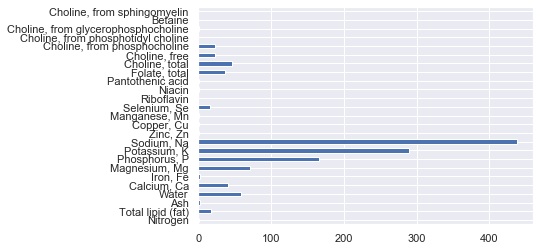

In [83]:
hummus = food_nutr_mean[food_nutr_mean['Hummus'].notnull()]['Hummus']
hummus

hummus.plot(kind='barh')

In [13]:
apples = food_nutr_mean[food_nutr_mean['APPLES, FUJI'].notnull()]['APPLES, FUJI']
apples

Nitrogen                  0.023750
Total lipid (fat)         0.162500
Ash                       0.428750
Sucrose                   1.590000
Glucose                   2.610000
Fructose                  8.400000
Lactose                   0.000000
Maltose                   0.000000
Water                    83.625000
Fiber, total dietary      2.075000
Calcium, Ca               6.125000
Iron, Fe                  0.015000
Magnesium, Mg             4.675000
Phosphorus, P             9.625000
Potassium, K            103.750000
Sodium, Na                1.000000
Zinc, Zn                  0.015000
Copper, Cu                0.032875
Manganese, Mn             0.032625
Thiamin                   0.006250
Riboflavin                0.067500
Niacin                    0.091250
Vitamin B-6               0.035500
Folate, total             0.000000
Name: APPLES, FUJI, dtype: float64

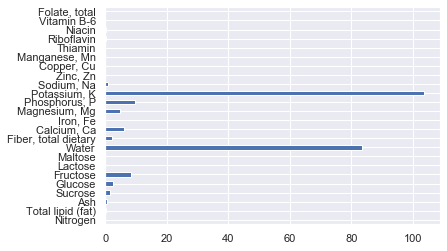

In [14]:
apples.plot(kind='barh')

In [15]:
rice = 'white rice, long grain, unenriched'
wrice = food_nutr_mean[food_nutr_mean[rice].notnull()][rice]
wrice

Nitrogen                                         1.182500
Total lipid (fat)                                1.033125
Ash                                              0.425000
Starch                                          74.358750
Water                                           11.187500
Fiber, total dietary                             0.148750
Calcium, Ca                                      4.460000
Iron, Fe                                         0.140500
Magnesium, Mg                                   26.525000
Phosphorus, P                                  108.200000
Potassium, K                                    82.262500
Sodium, Na                                       0.462500
Zinc, Zn                                         1.353625
Copper, Cu                                       0.213750
Manganese, Mn                                    0.981125
Molybdenum, Mo                                  64.175000
Selenium, Se                                     6.562500
Thiamin       

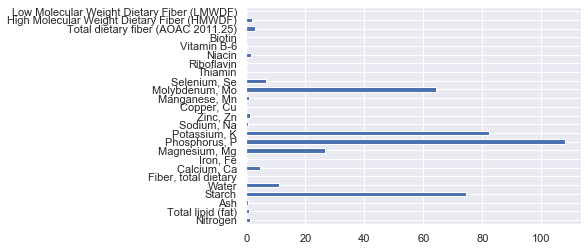

In [16]:
wrice.plot(kind='barh')

In [17]:
## Nutrient content of whole eggs
whole_eggs = food_nutr_mean[food_nutr_mean['Whole eggs'].notnull()]['Whole eggs']
whole_eggs

Nitrogen                          1.966429
Total lipid (fat)                10.290714
Ash                               1.161429
Water                            75.342857
Iodine, I                        62.260000
Vitamin D2 (ergocalciferol)       0.000000
Vitamin D3 (cholecalciferol)      2.271429
25-hydroxycholecalciferol         0.607143
Cholesterol                     420.214286
Name: Whole eggs, dtype: float64

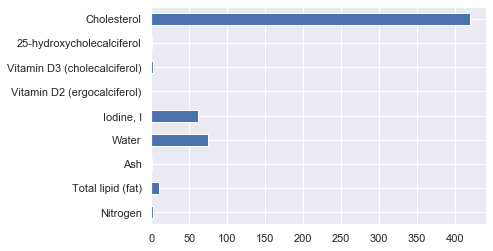

In [18]:
whole_eggs.plot(kind='barh')

### STDev Filter for outliers

In [19]:
# # Calculate stdev to find groupby outliers
# desc_std = desc.agg(np.std).transpose()
# desc_std = desc_std.drop('fdc_id', axis=0)
# # desc_std['SOY MILK, UNSWEETENED, PLAIN, SHELF STABLE']

# def stdev_check(stdev, lvl):
#     for std in stdev:
#         if std > lvl:
#             return 'High'
#         else:
#             return 'Low'

# check_std = desc_std.apply(stdev_check, lvl=1)


In [20]:
# type(check_std)

In [21]:
# # combined_updated = combined.set_index('YEAR')
# sns.heatmap(check_std=='High', cbar=False)
# plt.show()

### Using Regex to simplify nutrients

In [22]:
nutr_names = food_nutr_mean.index
carb_pattern1 = r'ose$'
carb_pattern2 = r'[Ss]ugar'

carb_names = nutr_names[nutr_names.str.contains(carb_pattern1) | nutr_names.str.contains(carb_pattern2) |
                       nutr_names.str.contains('[Ss]tarch') |
                       nutr_names.str.contains('[Cc]arb')] # need to add starch, sugar to this list
carb_names

Index(['Carbohydrate, by difference', 'Starch', 'Sucrose', 'Glucose',
       'Fructose', 'Lactose', 'Maltose', 'Carbohydrate, by summation',
       'Sugars, Total', 'Galactose', 'Raffinose', 'Stachyose', 'Total Sugars',
       'Verbascose'],
      dtype='object')

In [23]:
fat_pattern1 = r'[SU]FA\b'
fat_pattern2 = r'[fF]at'
fat_names = nutr_names[nutr_names.str.contains(fat_pattern1) | nutr_names.str.contains(fat_pattern2)]
fat_names

Index(['Total lipid (fat)', 'Total fat (NLEA)', 'Fatty acids, total trans',
       'Fatty acids, total saturated', 'SFA 4:0', 'SFA 6:0', 'SFA 8:0',
       'SFA 10:0', 'SFA 12:0', 'SFA 14:0', 'SFA 16:0', 'SFA 18:0', 'SFA 20:0',
       'MUFA 18:1', 'PUFA 18:2', 'PUFA 18:3', 'PUFA 20:4',
       'PUFA 22:6 n-3 (DHA)', 'SFA 22:0', 'PUFA 18:4', 'MUFA 20:1',
       'PUFA 20:5 n-3 (EPA)', 'MUFA 22:1', 'PUFA 22:5 n-3 (DPA)',
       'Fatty acids, total monounsaturated',
       'Fatty acids, total polyunsaturated', 'SFA 15:0', 'SFA 17:0',
       'SFA 24:0', 'PUFA 18:2 CLAs', 'MUFA 24:1 c', 'PUFA 20:2 n-6 c,c',
       'MUFA 16:1 c', 'MUFA 18:1 c', 'PUFA 18:2 n-6 c,c', 'MUFA 22:1 c',
       'PUFA 18:3 n-6 c,c,c', 'MUFA 17:1', 'PUFA 20:3',
       'Fatty acids, total trans-monoenoic',
       'Fatty acids, total trans-dienoic',
       'Fatty acids, total trans-polyenoic', 'MUFA 15:1', 'PUFA 22:2',
       'SFA 11:0', 'PUFA 18:3 n-3 c,c,c (ALA)', 'PUFA 20:3 n-3',
       'PUFA 20:3 n-6', 'PUFA 18:3i', 'P

In [24]:
prot_pattern1 = r'(?<!chol)ine$'
prot_pattern2 = r'[Pp]rot'
prot_pattern3 = r'[nN]itro'
prot_names = nutr_names[nutr_names.str.contains(prot_pattern1) | nutr_names.str.contains(prot_pattern2) 
                        | nutr_names.str.contains(prot_pattern3)]
prot_names

Index(['Nitrogen', 'Protein', 'Betaine', 'Threonine', 'Isoleucine', 'Leucine',
       'Lysine', 'Methionine', 'Cystine', 'Phenylalanine', 'Tyrosine',
       'Valine', 'Arginine', 'Histidine', 'Alanine', 'Glycine', 'Proline',
       'Serine', 'Hydroxyproline', 'Cysteine', 'Ergothioneine'],
      dtype='object')

### Take these macros and put them into a single row

In [25]:
nutr_mean_df = food_nutr_mean.transpose()

nutr_mean_df['total protein'] = nutr_mean_df[np.asarray(prot_names)].sum(axis=1).replace(0.0,np.nan)
nutr_mean_df['total fat'] = nutr_mean_df[np.asarray(fat_names)].sum(axis=1).replace(0.0,np.nan)
nutr_mean_df['total carbs'] = nutr_mean_df[np.asarray(carb_names)].sum(axis=1).replace(0.0,np.nan)
# # nutr_mean_df.head()
nutr_mean_df.head()
# nutr_mean_df['total protein'].isnull().sum()

,Nitrogen,Protein,Total lipid (fat),"Carbohydrate, by difference",Ash,Energy,Starch,Sucrose,Glucose,Fructose,...,Vitamin D4,Ergosta-7-enol,"Ergosta-7,22-dienol","Ergosta-5,7-dienol",Verbascose,Low Molecular Weight Dietary Fiber (LMWDF),Glutathione,total protein,total fat,total carbs
description,,,,,,,,,,,,,,,,,,,,,
Egg whites,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Egg whites, dried",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Egg yolk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Egg yolks, dried",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Whole eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
i = 0
for f in nutr_mean_df.index:
    row = nutr_mean_df.loc[f]
#     print(row)
    if not np.isnan(row['total protein']):
        i+=1
    elif not np.isnan(row['total carbs']):
        i+=1
    elif not np.isnan(row['total fat']):
        i+=1
print(i)

3139


In [27]:
food_nutr_mean.head()

description,Egg whites,"Egg whites, dried",Egg yolk,"Egg yolks, dried",Whole eggs,"Whole eggs, dried","ALMOND MILK, UNSWEETENED, PLAIN, SHELF STABLE","APPLE JUICE FROM CONCENTRATE WITH ADDED VITAMIN C, SHELF STABLE","APPLES, FUJI","APPLES, FUJI, WITH SKIN, RAW",...,"tomato, paste, canned, double- concentrated, without salt added","tomato, paste, canned, without salt added","tomato, puree, canned, no salt added","tomato, puree, canned, salt added","tomato, sauce, canned, with salt added","tomatoes, crushed, canned, no salt added","tomatoes, crushed, canned, salt added","tomatoes, whole, canned, solids and liquids, with salt added","white rice, long grain, unenriched","yogurt, plain, nonfat"
Nitrogen,NaN,NaN,NaN,NaN,NaN,NaN,0.088750,0.01375,0.02375,0.023750,...,0.80,0.660000,0.241429,0.33,0.21625,0.27,0.224286,0.13875,1.182500,0.66250
Protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total lipid (fat),NaN,NaN,NaN,NaN,NaN,NaN,1.221250,0.28625,0.16250,0.162500,...,0.78,0.725714,0.238571,0.45,0.38250,0.35,0.404286,0.20625,1.033125,0.08750
"Carbohydrate, by difference",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash,NaN,NaN,NaN,NaN,NaN,NaN,0.487222,0.12375,0.42875,0.427875,...,3.02,2.900000,0.938571,1.51,1.72375,0.76,1.134286,0.70875,0.425000,1.03875


In [96]:
all_nan_columns = food_nutr_mean.index[food_nutr_mean.isna().all(axis=1)]

protnan = nutr_mean_df[nutr_mean_df[['total protein', 'total fat', 'total carbs']].isna()]
# fatnan = nutr_mean_df['total fat'].isna().sum()
# carbnan = nutr_mean_df['total carbs'].isna().sum()
protnan.head()


ValueError: cannot reindex from a duplicate axis

In [97]:
# Specify the three columns to check for NaN values
specific_columns = ['total protein', 'total fat', 'total carbs']

# Identify NaN values in the specified columns and count them
nan_counts_in_specific_columns = nutr_mean_df[specific_columns].isna().sum(axis=1)

# Count rows with NaN values in the three specified columns
rows_with_nans_in_specific_columns = (nan_counts_in_specific_columns == 3).sum()

print(f"Number of rows with NaN values in the columns {specific_columns}: {rows_with_nans_in_specific_columns}")


Number of rows with NaN values in the columns ['total protein', 'total fat', 'total carbs']: 4082


In [28]:
s = 0
for f in food_nutr_mean.index:
    row = food_nutr_mean.loc[f]
    s+=1
    print(row)
    if s == 1:
        break


description
 Egg whites                                                          NaN
 Egg whites, dried                                                   NaN
 Egg yolk                                                            NaN
 Egg yolks, dried                                                    NaN
 Whole eggs                                                          NaN
                                                                  ...   
tomatoes, crushed, canned, no salt added                        0.270000
tomatoes, crushed, canned, salt added                           0.224286
tomatoes, whole, canned, solids and liquids, with salt added    0.138750
white rice, long grain, unenriched                              1.182500
yogurt, plain, nonfat                                           0.662500
Name: Nitrogen, Length: 7221, dtype: float64


In [29]:
adict = {'a':[0,1,2], 'b':[3,4,5], 'c':[6,7,8]}
adf = pd.DataFrame(adict)
adf['sum'] = adf[['b', 'c']].sum(axis=1)
adf.head()

,a,b,c,sum
0,0,3,6,9
1,1,4,7,11
2,2,5,8,13


In [30]:

# Sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# Loop over rows using iterrows()
for index, row in df.iterrows():
    print(index)
    print(row)

0
A    1
B    4
Name: 0, dtype: int64
1
A    2
B    5
Name: 1, dtype: int64
2
A    3
B    6
Name: 2, dtype: int64
